In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
# Run with kaggle:
# Data=pd.read_csv('/kaggle/input/insurance/insurance.csv')
Data=pd.read_csv('insurance.csv')

Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
data=Data.dropna()
data.drop_duplicates(inplace=True)
print(data.dtypes)
data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
data['sex']=data['sex'].replace({"female":0,'male':1})
data['smoker']=data['smoker'].replace({'yes':1,'no':0})
data['region']=data['region'].replace({'southeast':1,'northwest':0,'northeast':2,'southwest':3})
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [69]:
x=data.iloc[:,[0,1,2,3,6,5]].values
y=data.iloc[:,[4]].values
print(x)
print(y)

[[1.90000000e+01 0.00000000e+00 2.79000000e+01 0.00000000e+00
  1.68849240e+04 3.00000000e+00]
 [1.80000000e+01 1.00000000e+00 3.37700000e+01 1.00000000e+00
  1.72555230e+03 1.00000000e+00]
 [2.80000000e+01 1.00000000e+00 3.30000000e+01 3.00000000e+00
  4.44946200e+03 1.00000000e+00]
 ...
 [1.80000000e+01 0.00000000e+00 3.68500000e+01 0.00000000e+00
  1.62983350e+03 1.00000000e+00]
 [2.10000000e+01 0.00000000e+00 2.58000000e+01 0.00000000e+00
  2.00794500e+03 3.00000000e+00]
 [6.10000000e+01 0.00000000e+00 2.90700000e+01 0.00000000e+00
  2.91413603e+04 0.00000000e+00]]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [70]:
x=scale(x)
x

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  0.2978567 ,
         1.37020492],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.9543806 ,
        -0.44003617],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.72937251,
        -0.44003617],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.96228744,
        -0.44003617],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.9310536 ,
         1.37020492],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.31029752,
        -1.34515671]])

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


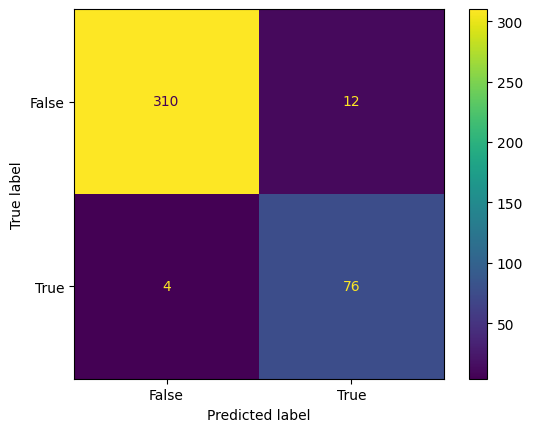

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
xx=confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = xx,
display_labels = [False, True])
cm_display.plot()
plt.show()

In [75]:
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

0.9601990049751243